# Unit 5 - Financial Planning

In [21]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [22]:
# Load .env enviroment variables
load_dotenv(dotenv_path="Alpaca.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [23]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [24]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [25]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $35984.40
The current value of your 5.3 ETH is $10182.62


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [26]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [27]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [28]:
# Format current date as ISO format
today = pd.Timestamp("2023-04-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today,
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_portfolio[df_portfolio["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
combined_df = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
combined_df.head()

AGG                                            \
                             open   high    low  close   volume trade_count   
timestamp                                                                     
2023-04-12 04:00:00+00:00  100.17  100.2  99.62  99.93  6595474       33107   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-04-12 04:00:00+00:00  99.881382  411.87  412.17  407.44  408.05   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-04-12 04:00:00+00:00  83348254      613549  409.707746

In [31]:
# Pick AGG and SPY close prices
agg_close_price = float(combined_df.loc[:, ('AGG', 'close')])
spy_close_price = float(combined_df.loc[:, ('SPY', 'close')])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.93
Current SPY closing price: $408.05


In [32]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20402.50
The current value of your 200 AGG shares is $19986.00


### Savings Health Analysis

In [33]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value

# Create savings DataFrame
savings_data = {'amount': [total_crypto_value, total_shares_value]}
index = ['crypto', 'shares']
savings_df = pd.DataFrame(savings_data, index=index)

# Display savings DataFrame
display(savings_df)

,amount
crypto,46167.025
shares,40388.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

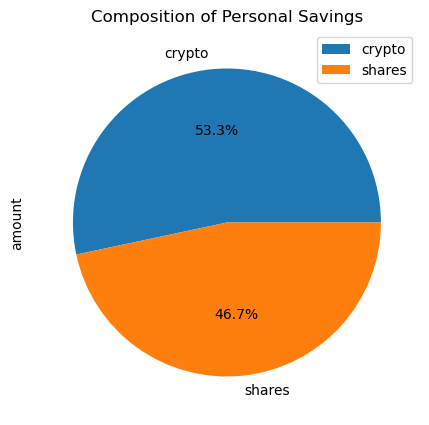

In [34]:
# Plot savings pie chart
savings_df.plot.pie(y='amount', title="Composition of Personal Savings", figsize=(10, 5), autopct='%1.1f%%')


In [36]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = savings_df['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal of having an emergency fund.")
else:
    amount_short = emergency_fund - total_savings
    print(f"You are ${amount_short} away from reaching your financial goal of having an emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [39]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp("2018-04-12", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-04-12", tz="America/New_York").isoformat()

In [47]:
# Get 5 years' worth of historical data for AGG
df_historical_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_historical_data[df_historical_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_historical_data[df_historical_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
combined_df_historical_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
combined_df_historical_data.head()


AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2018-04-12 04:00:00+00:00  106.91  106.9300  106.76  106.77  3899002   
2018-04-13 04:00:00+00:00  106.69  106.8400  106.67  106.80  2764839   
2018-04-16 04:00:00+00:00  106.64  106.8400  106.61  106.82  3860890   
2018-04-17 04:00:00+00:00  106.81  106.8899  106.75  106.85  2362997   
2018-04-18 04:00:00+00:00  106.74  106.7510  106.54  106.55  2231676   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-04-12 04:00:00+00:00       13576  106.806356  265.26  267.00  265.06   
2018-04-13 04:00:00+00:00       11536  106.786953  267.41  267.54  264.01   
2018-04-16 04:00:00+00:00       13789  106.777580  267.00  268.20  266.07   
2018-04-17 04:00:00+00:00        9268  106.843189  269.33  270.87  268.75   
2018-04-18 04:00:00+00:00        9647  106.639143  270.69  271.30  269.87   

                                                                       
                              close    volume trade_count        vwap  
timestamp                                                              
2018-04-12 04:00:00+00:00  265.9003  69002592      282541  266.017978  
2018-04-13 04:00:00+00:00  265.1100  86127234      311313  265.541433  
2018-04-16 04:00:00+00:00  267.3700  63625287      251422  267.298482  
2018-04-17 04:00:00+00:00  270.1300  64886136      253683  269.795896  
2018-04-18 04:00:00+00:00  270.3700  58608057      197540  270.674441

In [48]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60 = MCSimulation(
    portfolio_data = combined_df_historical_data,
    weights=[0.4, 0.6],  # AGG is 40%, SPY is 60%
    num_simulation=500,
    num_trading_days=252*30
)

In [49]:
# Printing the simulation input data
MC_40_60.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2018-04-12 04:00:00+00:00  106.91  106.9300  106.76  106.77  3899002   
2018-04-13 04:00:00+00:00  106.69  106.8400  106.67  106.80  2764839   
2018-04-16 04:00:00+00:00  106.64  106.8400  106.61  106.82  3860890   
2018-04-17 04:00:00+00:00  106.81  106.8899  106.75  106.85  2362997   
2018-04-18 04:00:00+00:00  106.74  106.7510  106.54  106.55  2231676   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-04-12 04:00:00+00:00       13576  106.806356          NaN  265.26   
2018-04-13 04:00:00+00:00       11536  106.786953     0.000281  267.41   
2018-04-16 04:00:00+00:00       13789  106.777580     0.000187  267.00   
2018-04-17 04:00:00+00:00        9268  106.843189     0.000281  269.33   
2018-04-18 04:00:00+00:00        9647  106.639143    -0.002808  270.69   

                                                                           \
                             high     low     close    volume trade_count   
timestamp                                                                   
2018-04-12 04:00:00+00:00  267.00  265.06  265.9003  69002592      282541   
2018-04-13 04:00:00+00:00  267.54  264.01  265.1100  86127234      311313   
2018-04-16 04:00:00+00:00  268.20  266.07  267.3700  63625287      251422   
2018-04-17 04:00:00+00:00  270.87  268.75  270.1300  64886136      253683   
2018-04-18 04:00:00+00:00  271.30  269.87  270.3700  58608057      197540   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-04-12 04:00:00+00:00  266.017978          NaN  
2018-04-13 04:00:00+00:00  265.541433    -0.002972  
2018-04-16 04:00:00+00:00  267.298482     0.008525  
2018-04-17 04:00:00+00:00  269.795896     0.010323  
2018-04-18 04:00:00+00:00  270.674441     0.000888

In [50]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/regulolanz/Desktop/Fintech Bootcamp/05 - APIs/fintech_financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988556,0.997393,0.994012,1.008084,1.019166,1.009209,1.012244,0.994810,0.997676,1.002104,...,1.010325,1.000131,1.003511,0.995963,0.990845,1.027367,0.987515,0.994910,0.994270,1.001862
2,1.000189,1.012329,1.002913,1.014619,1.018146,1.013002,1.008124,0.994543,1.010515,0.995226,...,1.009518,1.000635,1.020041,1.000925,0.987775,1.029702,0.992423,0.985354,1.006117,1.006614
3,0.985976,1.015567,1.008383,1.007094,1.007148,1.014570,0.996639,0.990700,1.006453,0.993804,...,1.016804,1.009923,1.020989,1.005036,0.993288,1.025949,0.987669,0.981321,1.000787,0.997522
4,0.980654,1.009490,1.020241,1.011248,1.014334,1.006418,1.000452,0.991200,1.007402,1.005444,...,1.027597,1.004366,1.042987,0.998625,0.999286,1.015280,0.991321,0.971398,1.000561,1.020603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.442199,1.728292,5.596603,6.399679,16.345151,18.349691,3.206844,11.584064,2.231543,3.838380,...,2.687599,1.110294,6.167581,18.950665,16.730060,2.620821,2.118140,4.867493,1.991917,13.678756
7557,2.433752,1.734488,5.530457,6.445343,16.462732,18.518081,3.181625,11.732226,2.235532,3.796864,...,2.669060,1.108097,6.174759,18.987713,16.701340,2.616968,2.078345,4.834258,1.953863,13.652795
7558,2.419867,1.709082,5.584880,6.485048,16.370028,18.209202,3.167718,11.730064,2.229923,3.845141,...,2.682691,1.106763,6.145458,19.123232,16.742093,2.619072,2.083918,4.800163,1.936675,13.628064
7559,2.400679,1.725030,5.516934,6.483008,16.481148,18.197432,3.172183,11.806268,2.216203,3.854022,...,2.685403,1.113116,6.198712,19.000090,16.762422,2.594278,2.091050,4.797822,1.938107,13.477621


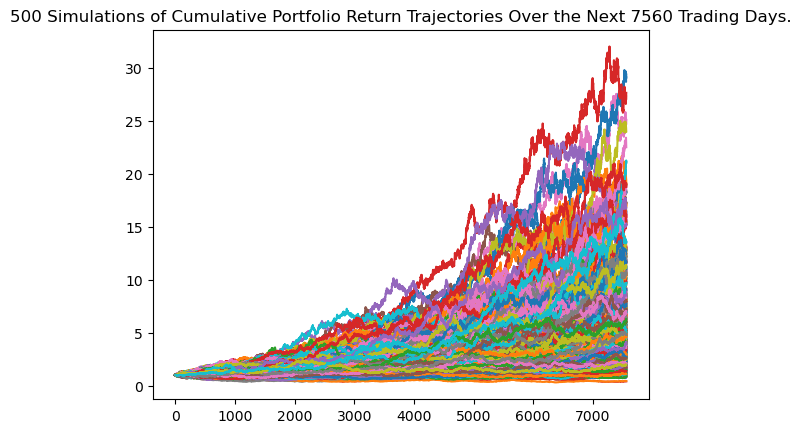

In [51]:
# Plot simulation outcomes
line_plot = MC_40_60.plot_simulation()

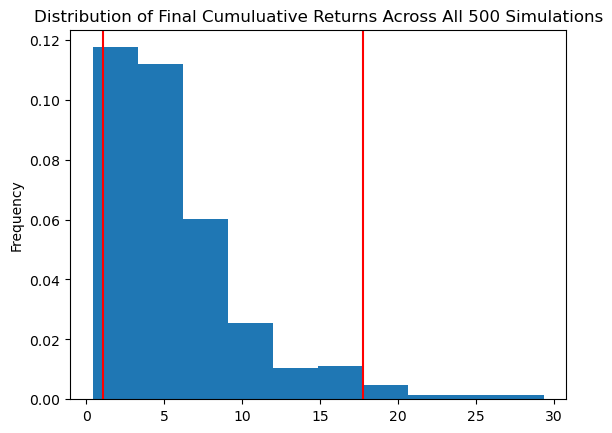

In [52]:
# Plot probability distribution and confidence intervals
dist_plot = MC_40_60.plot_distribution()

### Retirement Analysis

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_40_60.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean              5.791663
std               4.398844
min               0.415966
25%               2.775329
50%               4.500768
75%               7.394127
max              29.356593
95% CI Lower      1.076044
95% CI Upper     17.768782
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95594.94 and $1281072.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143392.41 and $1921608.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


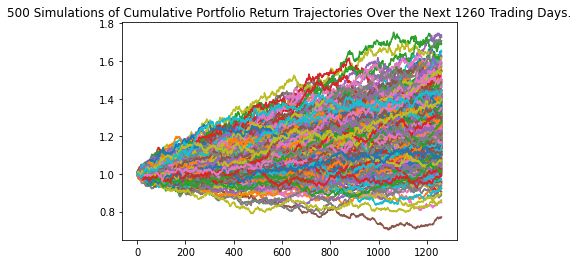

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

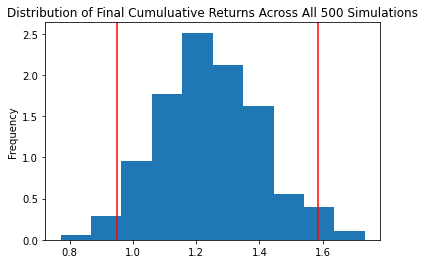

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


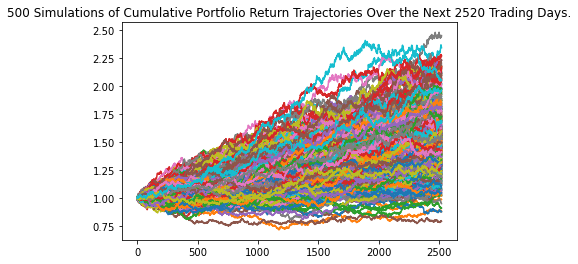

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

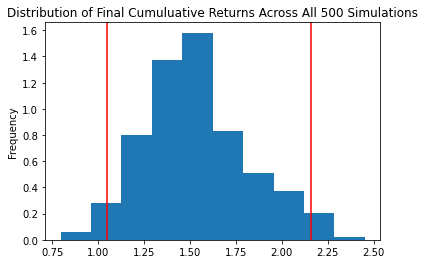

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
